# Tree-based Methods
We are going to see in this practice how to build different models (simple tree, random forest...) for a classification problem. 

For this practice we are using "adult" dataset that we extracted from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) of open source datasets. This site provides a lot of datasets which can be very useful to build simple models on real data as we are going to do during this practice.




## Importing data 

The prediction task we have is to determine if a person makes more than 50K a year based on multiple feature variables: age, educational level, workclass, sex, race...

We have provided the list of column names below. 

**1- Import train and test datasets from the urls:**

train_set:  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

test_set: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

Make sure you give the column names provided in the list *names*


In [2]:
import pandas as pd
column_names = ["age", "workclass","fnlwgt", "education","education-num", "marital-status", "occupation", "relationship",
         "race","sex", "capital-gain", "capital-loss","hours-per-week","native-country","income"]
train_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names = column_names)
test_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", names = column_names)


## Data preprocessing

Take a look at you at the two datasets. What do you notice on the test data ? Make the necessary changes. 

In [3]:
# train dataset
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# test dataset
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [5]:
# make changes 
test_data = test_data.drop(0,0) # test_data.drop(index=0,inplace=True)
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


**3-The variable to be learned is "income". 
Get all its the possible values from training and test datasets.** 
Tip: use the function unique


In [6]:
print(train_data["income"].unique())
print(test_data["income"].unique())

[' <=50K' ' >50K']
[' <=50K.' ' >50K.']


We will now transform the "income" variable to a binary one: 1 if  the income is <=50K and 0 otherwise. 

**4-Write a function binarize() that does the transformation for one string and then apply it to the whole dataset.** 


In [7]:
def binarize(income):
    if income ==" <=50K." or income ==" <=50K": 
      return 1
    elif income ==" >50K." or income == " >50K" :
      return 0
    else: 
      return income
train_data["income"] = train_data["income"].apply(binarize)
test_data["income"] = test_data["income"].apply(binarize)
print(train_data["income"])
print(test_data["income"])

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    0
32558    1
32559    1
32560    0
Name: income, Length: 32561, dtype: int64
1        1
2        1
3        0
4        0
5        1
        ..
16277    1
16278    1
16279    1
16280    1
16281    0
Name: income, Length: 16281, dtype: int64


**5-Remove columns with names "fnlwgt", "education" training and test datasets. We remove them because education is redundant with "education-num"	and "fnlwgt" is not relevant for out model.**

In [8]:
train_data = train_data.drop(columns=["fnlwgt","education"])
test_data = test_data.drop(columns =["fnlwgt","education"])

In [9]:
# check that columns have been removed correctly in train dataset
train_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [10]:
# and test dataset
test_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,1
2,38,Private,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,1
3,28,Local-gov,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,0
4,44,Private,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,0
5,18,?,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,1


We will continue processing of the data: 

**6-Check missing values in the data by counting values of each column (use function count() or describe())**

In [11]:
print(train_data.describe())
print(test_data.describe())

                age  education-num  ...  hours-per-week        income
count  32561.000000   32561.000000  ...    32561.000000  32561.000000
mean      38.581647      10.080679  ...       40.437456      0.759190
std       13.640433       2.572720  ...       12.347429      0.427581
min       17.000000       1.000000  ...        1.000000      0.000000
25%       28.000000       9.000000  ...       40.000000      1.000000
50%       37.000000      10.000000  ...       40.000000      1.000000
75%       48.000000      12.000000  ...       45.000000      1.000000
max       90.000000      16.000000  ...       99.000000      1.000000

[8 rows x 6 columns]
       education-num  capital-gain  capital-loss  hours-per-week        income
count   16281.000000  16281.000000  16281.000000    16281.000000  16281.000000
mean       10.072907   1081.905104     87.899269       40.392236      0.763774
std         2.567545   7583.935968    403.105286       12.479332      0.424776
min         1.000000      0.0000

We also notice that the column age, which supposed to be numeric, is not numeric since it does not appear in describe() of test_data. 

**7-Change type of this column to integer in test_data.**

In [12]:
test_data["age"] = test_data["age"].astype(int) 

We have finished data cleaning we can move to prepare data for the model.

**8- Split train dataset into x_train  and y_train where y_train contains the income and x_train all the other columns.** 

In [13]:
x_train = train_data.drop(columns = ["income"])
x_train.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [14]:
y_train = train_data["income"]
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: income, dtype: int64

**9-Do the same thing to the test data.**

In [15]:
x_test = test_data.drop(columns = ["income"])
y_test = test_data["income"]


**10-Try to build a a simple tree using  DecisionTreeClassifier from sklearn.tree and fit it on training data.**




In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

**11-What is the issue you have encounetered?**





We are going to test two types of encoders: 

Label encoder: counts the number (n) of categories we have and then encodes each one of the different possible values with a number between 0 and n-1. 
This encoder only replaces the original with the encoded data. So the dimension of the data is not changed. 

Example: 

We will apply a label encoder!to a list: ["a", "b", "b", "a", "c"]

In [17]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
l = ["a", "b", "b", "a", "c" ]
# We first fit the model to recognize the classes 
le.fit(l)
print("The classes are:", le.classes_)
# After fitting the encoder we use it to transform the data 
le.transform(l)

The classes are: ['a' 'b' 'c']


array([0, 1, 1, 0, 2])

A second famous encoder is One Hot encoder: 

For a givern categorical column every possible value results in a new column. Then, for each row, we put 1 in the column with the name of the category value we have and 0 in the others. 

We generally have 2 choices to proceed with this type of encoding: 

*   OneHotEncoder from sklearn.preprocessing
*   get_dummies() function from pandas

Using the first option creates additional complications when we have both categorical and non categorical variables in our dataset, which is the case here. That's why it is prefereable to use get_dummies. 


Example: 

We will apply One Hot encoder to the same list:  ["a", "b", "b", "a", "c" ]

In [18]:
import pandas as pd
l = ["a", "b", "b", "a", "c" ]
pd.get_dummies(l)

,a,b,c
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1


For the information there is also the get_dummies() function from pandas library that provides one hot encoding. It is slightly different in handling some cases, that's why we prefer to use the first method.

## Building model

We have seen that we have to encode the data before training the model.  
We will define 2 models: one with label encoding and another with one hot encoding.

### Using label encoding

Encode train and test data.

First we will combine train and data to fit the encoder (otherwise we would have problems transforming fata because of eventual unrecognized categories) 
 

**12-Concatenate training and test data and make sure there are no problems.**

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combined_data = pd.concat([x_train, x_test]).reset_index(drop =True)
combined_data.head()
len(combined_data)
combined_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


**13- Apply label encoding to combined data.** 

To avoid having to encode each column independently, dataframe.apply() as indicated after.

In [20]:
encoded_combined_data = combined_data.apply(le.fit_transform)
encoded_combined_data.head()


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,7,12,4,1,1,4,1,27,0,39,39
1,33,6,12,2,4,0,4,1,0,0,12,39
2,21,4,8,0,6,1,4,1,0,0,39,39
3,36,4,6,2,6,0,2,1,0,0,39,39
4,11,4,12,2,10,5,2,0,0,0,39,5


**14- Split the data again using training and test size from train_data and test_data.**

In [21]:
train_size = x_train.shape[0]
test_size = x_test.shape[0]
encoded_x_train = encoded_combined_data[:train_size]
encoded_x_test = encoded_combined_data[train_size:train_size+test_size]

In [57]:
x_train.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


Now we can finally train our model.
First we won't use any of the parameters. 

**15-Fit model using DecisionTreeClassifier function with default parameter values.**

In [22]:
from sklearn.tree import DecisionTreeClassifier

model = clf.fit(encoded_x_train,y_train)

**16- Use the fitted model to predict training data and check accuracy.** 


In [23]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(encoded_x_train)
print("Training accuracy is:", accuracy_score(y_train,y_train_pred))

Training accuracy is: 0.976413500813857


Our algorithm has an excellent accuracy on training data. 

**17-Predict now test data and compute accuracy. Compare training accuracy and test accuracy. What is the conclusion we can make ?** 


In [24]:
y_test_pred = model.predict(encoded_x_test)
print("Test accuracy is:", accuracy_score(y_test,y_test_pred))

Test accuracy is: 0.8118051716725017


### Using One Hot Encoder

Now we are going to do the same steps  but using one hot encoding. As we have said before we prefer to use get_dummies function. 

**18- Encode data using One Hot Encoding and split data to test and train**


In [25]:
ncoded_combined_data = pd.get_dummies(combined_data)
# split the data to again to train and test
encoded_x_train = encoded_combined_data[:train_size]
encoded_x_test = encoded_combined_data[train_size:train_size+test_size]
encoded_combined_data.shape
encoded_combined_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,7,12,4,1,1,4,1,27,0,39,39
1,33,6,12,2,4,0,4,1,0,0,12,39
2,21,4,8,0,6,1,4,1,0,0,39,39
3,36,4,6,2,6,0,2,1,0,0,39,39
4,11,4,12,2,10,5,2,0,0,0,39,5


**19- Fit a new model on encoded data.**

In [26]:
model_2 = DecisionTreeClassifier(random_state=0)
model_2.fit(encoded_x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**20- Predict train and test labels using the new model and compute accuracy score each time. Comment on results.**


In [27]:
# Predicting training labels
y_train_pred = model_2.predict(encoded_x_train)
print("Training accuracy is:", accuracy_score(y_train,y_train_pred))
# Predicting test labels
y_test_pred = model_2.predict(encoded_x_test)
print("Test accuracy is:", accuracy_score(y_test,y_test_pred))


Training accuracy is: 0.976413500813857
Test accuracy is: 0.8127264910017812


In both encoding methods, we have high training accuracies with significantly lower test accuracies. This means we have some overfitting on our data. 


How do we normally reduce overfitting in case of Decision Tree methods ?

The most common way to reduce a tree is by pruning it. However, there is no built-in method that implement s cost complexity pruning for example, so unless if we want to properly define a pruning method we need to do changes that are slightly beyond the objective of this practice. 

Instead we have a simple alternative which is quite simple: when declaring the model with *DecisionTreeClassifier* function we can add an optional parameter *min_impurity_decrease*. This parameter controls the minimum decrease in criterion to perform a split. This means that if the best split in a given node provides a decrease inferior to this value, we will not allow the split to happen, and the node becomes a leaf node.

### Improving model

**21- Define a function which takes a *min_impurity_decrease* value, trains using this value and returns training and test accuracy scores in a form of a list of 2 values. Test the function with some values.**

In [28]:
def train_pruned_tree(min_decrease):
    model_2 = DecisionTreeClassifier(random_state=1, min_impurity_decrease = min_decrease )
    model_2.fit(encoded_x_train,y_train)
    y_train_pred = model_2.predict(encoded_x_train)
    train_accuracy = accuracy_score(y_train,y_train_pred)
    y_test_pred = model_2.predict(encoded_x_test)
    test_accuracy = accuracy_score(y_test,y_test_pred)  
    return ([train_accuracy, test_accuracy])
train_pruned_tree(0.01)

[0.8398083596941126, 0.8391376451077943]

**22- Train multiple models using varying values of *min_decrease* in the function and plot two lines: one for training accuracy scores and another for test accuracy scores.**
Use logarithmic scale for *min_decrease*.

Text(0, 0.5, 'Accuracy scores')

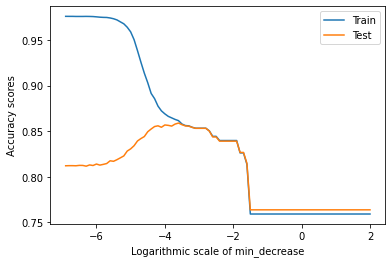

In [29]:
import numpy as np
import matplotlib.pyplot as plt 
min_decrease_list = 10**(np.array(range(20,-70,-1))/10)
a = [train_pruned_tree(min_decrease) for min_decrease in min_decrease_list]
b = np.array(a)
train_accuracies, test_accuracies = b[:,0],b[:,1]
plt.plot(np.log10(min_decrease_list),train_accuracies, ) 
plt.plot(np.log10(min_decrease_list),test_accuracies )
# plt.xscale('log')
plt.legend(["Train","Test"])
plt.xlabel("Logarithmic scale of min_decrease")
plt.ylabel("Accuracy scores")


 **23- Comment on the results you get and choose an optimal value for *min_decrease*.** 



To complete

### Random Forest model

We have seen how to improve a simple Decision Tree using varying parameters of the model. However, this is not the most common way to get improve tree based models. A more common method is to use Random Forests. The only reason we might not want random forest is to keep interpretability guaranteed by a single tree.

In the same way as before, we will build a Random Forest model. 

We won't change default parameters in the first place. 

**24- Train a Random Forest on the data and get training and accuracy scores. Comment on the results.** 



In [30]:
from sklearn.ensemble import RandomForestClassifier


model_3 = RandomForestClassifier(random_state=0)
model_3.fit(encoded_x_train,y_train)

y_train_pred = model_3.predict(encoded_x_train)
print("Training accuracy is:", accuracy_score(y_train,y_train_pred))

y_test_pred = model_3.predict(encoded_x_test)
print("Test accuracy is:", accuracy_score(y_test,y_test_pred))

Training accuracy is: 0.976413500813857
Test accuracy is: 0.8519746944290891


### Improving model



There are multiple parameters we can change to improve our Random Forest model. But if we vary all hyperparameters, it might take a very long time to find the optimal combination, thsus we are only going use 3 of them:

*   *min_impurity_decrease*: same as before
*   *n_estimators*: number of trees in our Random Forest
*   *max_features*: number of features we use in each iteration of the Random Forest algorithm (cf. lecture)

For  *min_impurity_decrease* we will use the same optimal value as before (it appears it is also optimal here) 0.00001.

**25-Implement a Random Forest model using this value.**

In [31]:
model_3 = RandomForestClassifier(random_state=0, min_impurity_decrease=0.00001)
model_3.fit(encoded_x_train,y_train)

y_train_pred = model_3.predict(encoded_x_train)
print("Training accuracy is:", accuracy_score(y_train,y_train_pred))

y_test_pred = model_3.predict(encoded_x_test)
print("Test accuracy is:", accuracy_score(y_test,y_test_pred))

Training accuracy is: 0.9277356346549553
Test accuracy is: 0.863091947669062


To find the best combination of hyperarameters we have chosen to change, we are going simply train the model on different combinations and we pick the best combination.

**26- Define possible combinations of n_estimators and max_features and use.**

Tip: what might be useful is to define a function that a takes a  combination as an input then fits the model and gives accuracy scores as output.

In [32]:
#we define the function just like train_pruned_tree function
from tqdm import tqdm

def train_for_comb(n_estimators, max_features):
    model_2 = RandomForestClassifier(random_state=1, min_impurity_decrease
                                     = 0.0001, n_estimators= n_estimators,
                                     max_features= max_features )
    model_2.fit(encoded_x_train,y_train)
    y_train_pred = model_2.predict(encoded_x_train)
    train_accuracy = accuracy_score(y_train,y_train_pred)
    y_test_pred = model_2.predict(encoded_x_test)
    test_accuracy = accuracy_score(y_test,y_test_pred)  
    return ([train_accuracy, test_accuracy])
 
n_estimators_list = [50,100,200,300,500]
max_features_list = [int(i) for i in np.linspace(1,encoded_x_train.shape[1], 10)]

# dictionary where we are going to store accuracy scores for each combination   
accuracy_dic ={}

# loop to compute all accuracies
for n_estimators in tqdm(n_estimators_list):
    for max_features in tqdm(max_features_list):
        x = train_for_comb(n_estimators, max_features)
        accuracy_dic[(n_estimators, max_features)]= x
        

100%|██████████| 5/5 [07:11<00:00, 86.29s/it]


In [33]:
curr_max = 0
for i,j in accuracy_dic:
  (train, test) = accuracy_dic[(i,j)]
  if min(train, test) > curr_max:
    curr_max = min(train, test)
print(curr_max)    

0.865978748234138


*Optional*

**27- Instead of manually looking for the best we can look for the best split. Use GridSearchCV to find it.** 

For help, consult [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). 


In [34]:
from sklearn.model_selection import GridSearchCV

# use label encoded data 

from sklearn.model_selection import GridSearchCV

n_estimators = [int(i) for i in np.linspace(50,300,3 )]
total_features = encoded_x_train.shape[1]
max_features =[int(i) for i in np.linspace(1,total_features, 10)]
tuned_parameters = {
                    'n_estimators': n_estimators,
                    'max_features': max_features}
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=tuned_parameters, scoring ="accuracy")
grid_search.fit(encoded_x_train, y_train)

print("The best combination: ", grid_search.best_params_)

y_test_pred = grid_search.predict(encoded_x_test)
print("Test accuracy is:", accuracy_score(y_test,y_test_pred))



The best combination:  {'max_features': 4, 'n_estimators': 300}
Test accuracy is: 0.8493335790184878
